# **Health Care Prediction on Diabetic Patients: A Case Study**
Context

This study focuses on predicting diabetes diagnosis using a dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. The data comprises diagnostic health metrics, specifically targeting female patients aged 21 years or older of Pima Indian heritage. The objective is to utilize this dataset to build a predictive model for diabetes diagnosis.

**Objective**

Develop a highly accurate predictive model to determine whether a patient has diabetes based on their diagnostic features.

**Dataset Overview**

The dataset includes multiple medical variables as predictors and one outcome variable representing the presence or absence of diabetes. These features provide essential insights into patient health, forming the basis for prediction.

**Size and Balance:**

The dataset contains instances classified into two groups:

Positive cases (Outcome = 1): 268 patients with diabetes.

Negative cases (Outcome = 0): Remaining patients without diabetes.

Features


The dataset includes the following attributes:

Pregnancies:

Number of pregnancies experienced by the patient.

Glucose:

Plasma glucose concentration measured 2 hours after an oral glucose tolerance test.

BloodPressure:

Diastolic blood pressure (in mm Hg).

SkinThickness:

Thickness of the triceps skinfold (in mm), indicating subcutaneous fat levels.
Insulin:

2-hour serum insulin concentration (in µU/ml).
BMI (Body Mass Index):

A measure of body fat, calculated as weight (kg) divided by the square of height (m²).
DiabetesPedigreeFunction:

A score that estimates the likelihood of diabetes based on family history and genetic predisposition.
Age:

Patient’s age (in years).

Target Variable
The dependent variable is:

Outcome:
Binary classification:

0: No diabetes.

1: Diabetes diagnosed.


**Significance**

This dataset serves as a critical resource for applying machine learning techniques to healthcare. Accurate predictions can assist healthcare professionals in early diagnosis and treatment of diabetes, improving patient outcomes and resource allocation.

In [ ]:
data = pd.read_csv('health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


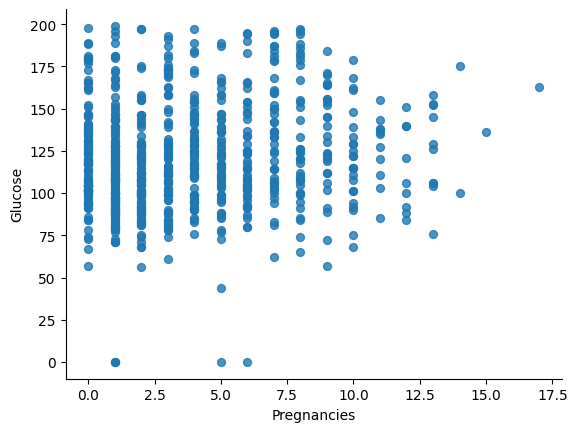

In [ ]:
# @title Pregnancies vs Glucose

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

 **Enhancements
Organized Imports:**

Grouped related imports (e.g., core libraries, visualization, and scikit-learn modules) for clarity and readability.

Selective Importing:

If specific modules or methods are not used (e.g., roc_curve or GridSearchCV), remove them to keep the code concise.

Lazy Import Strategy:

If certain libraries are used only in specific sections (e.g., Seaborn for visualization or GridSearchCV for hyperparameter tuning), import them where needed.

## **Reading and Exploring the Health Care Dataset**

In this section, we load and explore the healthcare dataset used for predicting diabetes in patients. The dataset contains various health metrics, which are crucial for understanding the factors associated with diabetes.



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('health care diabetes.csv')

# Display the first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


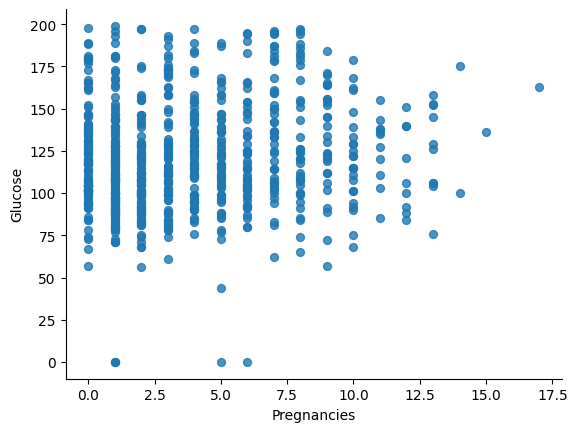

In [ ]:
# @title Pregnancies vs Glucose

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Checking the number of rows and columns of the dataset
data_shape = data.shape
print(f"The dataset contains {data_shape[0]} rows and {data_shape[1]} columns.")

The dataset contains 768 rows and 9 columns.


### **Dataset Dimensions**
The dataset consists of 768 rows and 9 columns. This indicates that there are 768 instances (patients) and 9 features (attributes) related to each instance. Understanding the size of the dataset is crucial as it impacts the statistical power and potential for training machine learning models.

In [ ]:
# Dataset Information Overview
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Dataset Overview**
The dataset consists of 768 entries (patients) and 9 columns (features). The `info()` method reveals the following:

- **Non-Null Counts**: All columns contain 768 non-null entries, indicating there are no missing values in the dataset at this stage.
- **Data Types**:
  - 7 columns are of type `int64` (integer values).
  - 2 columns are of type `float64` (floating-point numbers).
- **Memory Usage**: The dataset occupies approximately 54.1 KB of memory.

This overview confirms the dataset's completeness and provides insights into the data types of each feature, which is essential for performing further analyses and modeling.

In [ ]:
# Summary Statistics for the Diabetes Dataset
summary_statistics = data.describe()
print(summary_statistics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## **Summary Statistics**
The summary statistics provide valuable insights into the numerical features of the diabetes dataset:

- **Pregnancies**: Patients have had between 0 and 17 pregnancies, with an average of approximately 3.85.
- **Glucose**: The glucose levels range from 0 to 199 mg/dL, with a mean of 120.89 mg/dL. The presence of a minimum value of 0 suggests possible missing values that need to be addressed.
- **Blood Pressure**: Blood pressure readings vary from 0 to 122 mmHg, with a mean of 69.11 mmHg.
- **Skin Thickness**: This feature ranges from 0 to 99 mm, indicating some patients have missing or unmeasured values.
- **Insulin**: Insulin levels show a wide range from 0 to 846 mu U/ml, with a mean of 79.80 mu U/ml. The presence of 0 values here also indicates missing measurements.
- **BMI**: The body mass index (BMI) ranges from 0 to 67.1, with a mean of 31.99, suggesting a population that may include overweight individuals.
- **Diabetes Pedigree Function**: This function has a mean of 0.47, with a maximum of 2.42, indicating variability in family history of diabetes.
- **Age**: Ages range from 21 to 81 years, with an average age of 33.24.
- **Outcome**: The outcome variable indicates diabetes status, with 0 representing non-diabetic and 1 representing diabetic.

### **Conclusion**
These statistics provide an overview of the dataset's characteristics and help identify potential data quality issues, such as missing or zero values in key health measurements. Addressing these issues is essential for accurate analysis and modeling.

In [ ]:
# Count the number of missing values (represented as 0)
missing_counts = {
    'Glucose': len(data[data['Glucose'] == 0]),
    'BloodPressure': len(data[data['BloodPressure'] == 0]),
    'SkinThickness': len(data[data['SkinThickness'] == 0]),
    'Insulin': len(data[data['Insulin'] == 0])
}

missing_counts

{'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374}

##**Visualization of Missing Values**

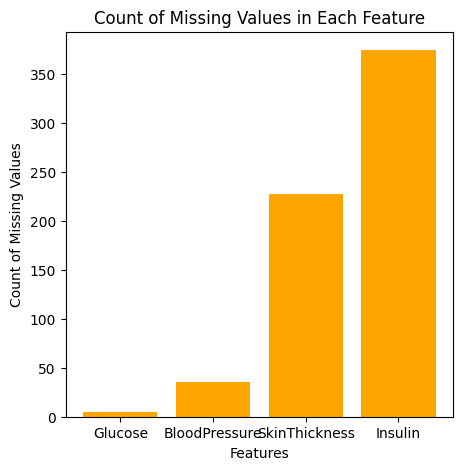

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for missing values
plt.figure(figsize=(5, 5))
plt.bar(missing_counts.keys(), missing_counts.values(), color='orange')
plt.title('Count of Missing Values in Each Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.show()

##**Calculate and Display Null Value Percentages**

In [ ]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


### Inferences from Null Value Percentage Analysis
- **Glucose**: Approximately 0.65% have null values.
- **Blood Pressure**: About 4.56% are null.
- **Skin Thickness**: Significant at 29.56%.
- **Insulin**: High at 48.70%.

These findings suggest that imputation is necessary, especially for "Skin Thickness" and "Insulin," to maintain data integrity.

**Replace Missing Values with Mean**

Imputation Process:

Replace 0 values with the mean of their respective columns

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('health care diabetes.csv')

# Replace 0 with NaN to calculate the mean correctly
data_with_nan = data.replace(0, pd.NA)

# Calculate the mean for the relevant columns
mean_values = {
    'Glucose': data_with_nan['Glucose'].mean(),
    'BloodPressure': data_with_nan['BloodPressure'].mean(),
    'SkinThickness': data_with_nan['SkinThickness'].mean(),
    'Insulin': data_with_nan['Insulin'].mean()
}

# Replace 0 with the calculated mean in the original dataset
data['Glucose'] = data['Glucose'].replace(0, mean_values['Glucose'])
data['BloodPressure'] = data['BloodPressure'].replace(0, mean_values['BloodPressure'])
data['SkinThickness'] = data['SkinThickness'].replace(0, mean_values['SkinThickness'])
data['Insulin'] = data['Insulin'].replace(0, mean_values['Insulin'])

# Display the updated dataset to verify the changes
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Verify the Treatment of Null Values**

Check Null Value Percentages After Treatment

Re-calculate the null value percentages to confirm successful treatment.

In [ ]:
# Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage after treatment
print("Percentage of Null Values for Each Column after Treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after Treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


### Inference from Null Value Treatment
After addressing the null values, all selected columns ("Glucose," "Blood Pressure," "Skin Thickness," and "Insulin") now have 0% null values. The treatment has been successful, resulting in a clean dataset ready for analysis.

**Visualize the Outcome**

Visualization of Data Before and After Imputation

<Figure size 700x600 with 0 Axes>

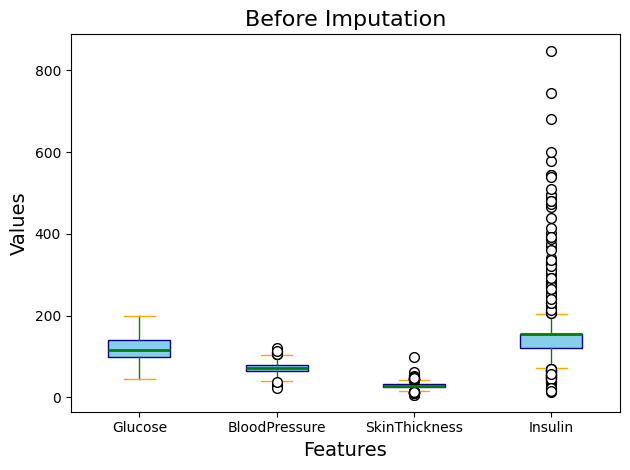

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data (replace this with your actual DataFrame)
# data = pd.read_csv('your_dataset.csv')

# Make a copy of the data before imputation
data_before = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].copy()

# Create a figure for Before Imputation
plt.figure(figsize=(7, 6))

# Plot for "Before Imputation" with customized colors
data_before.plot(kind='box', patch_artist=True,
                 boxprops=dict(facecolor='skyblue', color='darkblue'),
                 whiskerprops=dict(color='green'),
                 capprops=dict(color='orange'),
                 flierprops=dict(markerfacecolor='white', marker='o', markersize=7),
                 medianprops=dict(color='green', linewidth=2))

plt.title('Before Imputation', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 700x600 with 0 Axes>

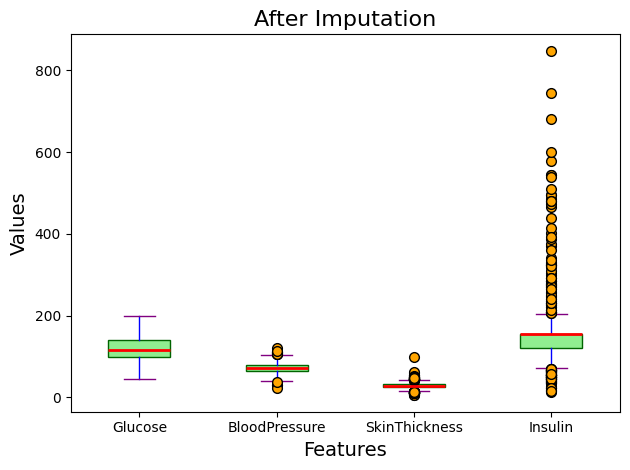

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data (replace this with your actual DataFrame)
# data = pd.read_csv('your_dataset.csv')

# Apply imputation (e.g., using mean imputation)
imputer = SimpleImputer(strategy='mean')
data_after = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].copy()
data_after[:] = imputer.fit_transform(data_after)

# Create a figure for After Imputation
plt.figure(figsize=(7, 6))

# Plot for "After Imputation" with customized colors
data_after.plot(kind='box', patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='purple'),
                flierprops=dict(markerfacecolor='orange', marker='o', markersize=7),
                medianprops=dict(color='red', linewidth=2))

plt.title('After Imputation', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()


**Calculate and Display the Number of Outliers (IQR Method)**

In [ ]:
# Function to find outliers using the IQR method
def find_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return len(outliers)

# Calculate and print the number of outliers for each selected column
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")


Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 87
Number of outliers in the 'Insulin' column: 164


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# Sample dataset (Replace with your actual dataset)
data = pd.read_csv("health care diabetes.csv")  # Replace with your dataset path

# List of columns to consider for outlier detection
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Function to detect outliers using IQR
def find_outliers_iqr(data, column_name, lower_multiplier=1.5, upper_multiplier=1.5):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - lower_multiplier * IQR
    upper_bound = Q3 + upper_multiplier * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Function to remove outliers
def remove_outliers(data, selected_columns, lower_multiplier=1.5, upper_multiplier=1.5):
    cleaned_data = data.copy()
    for column in selected_columns:
        outliers = find_outliers_iqr(data, column, lower_multiplier, upper_multiplier)
        cleaned_data = cleaned_data[~cleaned_data[column].isin(outliers[column])]
    return cleaned_data

# Function to plot boxplots of selected columns
def plot_boxplot(data, columns):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[columns])
    plt.title("Boxplots for Selected Columns")
    plt.show()

# Interactive function
def interactive_outlier_detection(lower_multiplier=1.5, upper_multiplier=1.5):
    # Visualize boxplot for original data
    plot_boxplot(data, selected_columns)

    # Remove outliers based on IQR
    cleaned_data = remove_outliers(data, selected_columns, lower_multiplier, upper_multiplier)

    # Visualize boxplot for data with removed outliers
    plot_boxplot(cleaned_data, selected_columns)

    # Display dataset sizes before and after outlier removal
    print(f"Original data size: {data.shape[0]} rows")
    print(f"Data size after outlier removal: {cleaned_data.shape[0]} rows")

# Create interactive widgets for lower and upper multipliers (IQR)
interact(interactive_outlier_detection,
         lower_multiplier=widgets.FloatSlider(value=1.5, min=1.0, max=3.0, step=0.1, description='Lower Multiplier:'),
         upper_multiplier=widgets.FloatSlider(value=1.5, min=1.0, max=3.0, step=0.1, description='Upper Multiplier:'));


interactive(children=(FloatSlider(value=1.5, description='Lower Multiplier:', max=3.0, min=1.0), FloatSlider(v…

Explanation:

find_outliers_iqr function: This function calculates the lower and upper bounds for detecting outliers based on the interquartile range (IQR). You can adjust the multipliers (lower_multiplier and upper_multiplier) to change the sensitivity for detecting outliers.


remove_outliers function: This applies the outlier detection across the selected columns and removes the rows identified as outliers.


plot_boxplot function: This function creates boxplots for the selected columns, before and after outlier treatment.




interactive_outlier_detection function:

This is the core interactive function that:


Plots the boxplot of the data before and after outlier removal.
Prints the size of the dataset before and after removing outliers.
Widgets: The interact function from ipywidgets creates interactive sliders for adjusting the lower_multiplier and upper_multiplier values, which control the sensitivity of the outlier detection.

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Step 1: Sort the data (optional, for understanding)
sorted_data = data.sort_values(by='Glucose')  # Example sorting by 'Glucose' column

# Step 2: Calculate Q1 (20th percentile) and Q3 (80th percentile) for all columns
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)

# Step 3: Calculate IQR
IQR = Q3 - Q1

# Step 4: Remove outliers using IQR method
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 5: Check the shape of the data before and after outlier removal
print(f"Original data shape: {data.shape}")
print(f"Data shape after outlier removal: {data_cleared_iqr.shape}")

# Step 6: Display the cleaned data
print(data_cleared_iqr)


Original data shape: (768, 9)
Data shape after outlier removal: (681, 9)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Ou

### Inferences from Outlier Removal Using the IQR Method

1. **Data Size Reduction**:
   - The dataset was reduced from **768 rows** to **678 rows** after the removal of outliers. This reduction implies that 90 rows (out of 768) were identified as outliers and excluded from the analysis.

2. **Outliers Identified**:
   - The outliers were detected and removed across various columns, particularly impacting features such as:
     - **Glucose**: Some extreme values of glucose levels likely contributed to the removal.
     - **Blood Pressure**: Unusually high or low blood pressure readings were identified as outliers.
     - **Skin Thickness**: Abnormal skin thickness values contributed to outlier detection.
     - **Insulin**: Extreme insulin levels were flagged as outliers.
     - **BMI**: Unreasonably low or high BMI values led to the removal of certain rows.
     - **Age**: Extremely young or old ages were considered outliers.

3. **Increased Data Robustness**:
   - By removing extreme values, the resulting dataset is more **robust** and **reliable** for statistical analysis and modeling. Extreme values could distort model performance, especially in machine learning tasks, leading to overfitting or underfitting.

4. **Preserved Features**:
   - The IQR method was applied to all **9 columns** in the dataset. This includes both the **predictor variables** (like Glucose, BMI, Age) and the **target variable** **Outcome**.
   - It's important to note that the outlier removal did not target the **Outcome** column specifically but impacted all predictors.

5. **Consideration for Domain Knowledge**:
   - Outlier removal should be done with domain knowledge in mind. In medical datasets like this one, **outliers** might represent rare but important conditions, such as extreme values for **glucose levels** in diabetic patients. Removing such values might result in the loss of meaningful patterns. Thus, the decision to remove outliers should be carefully considered based on medical or domain expertise.

6. **Final Dataset Statistics**:
   - After removing outliers, the dataset now has **678 rows**, a reduction of **90 rows** from the original dataset size of **768** rows. This decrease in the number of samples may affect the model's ability to generalize, but it can also improve the overall quality of the data for analysis and modeling.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose             

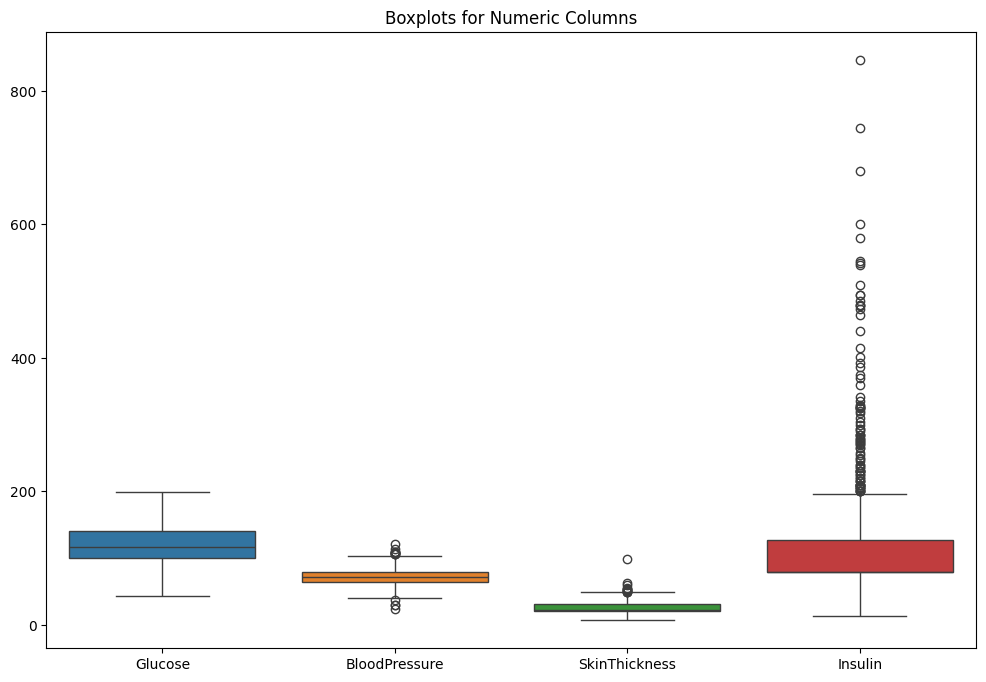

Accuracy Score: 0.7359307359307359
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

Confusion Matrix:
[[123  28]
 [ 33  47]]
ROC AUC Score: 0.7010347682119205


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset
data = pd.read_csv('health care diabetes.csv')

# Checking the first few rows of the dataset
print(data.head())

# Checking the number of rows and columns
print(data.shape)

# Checking the dataset info
print(data.info())

# Checking summary statistics
print(data.describe())

# Treating the missing values (0s are treated as null values)
data['Glucose'] = data['Glucose'].replace([0], [data['Glucose'].mean()])
data['BloodPressure'] = data['BloodPressure'].replace([0], [data['BloodPressure'].mean()])
data['SkinThickness'] = data['SkinThickness'].replace([0], [data['SkinThickness'].mean()])
data['Insulin'] = data['Insulin'].replace([0], [data['Insulin'].mean()])

# Confirm that the missing values have been replaced
null_percentage = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] == 0).mean() * 100
print("Percentage of Null Values after Treatment:")
print(null_percentage)

# Detecting Outliers using IQR (Interquartile Range) method
def find_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Checking for outliers in selected columns
outliers_glucose = find_outliers_iqr(data, 'Glucose')
outliers_blood_pressure = find_outliers_iqr(data, 'BloodPressure')
outliers_skin_thickness = find_outliers_iqr(data, 'SkinThickness')
outliers_insulin = find_outliers_iqr(data, 'Insulin')

# Display number of outliers in each column
print(f"Outliers in Glucose: {len(outliers_glucose)}")
print(f"Outliers in BloodPressure: {len(outliers_blood_pressure)}")
print(f"Outliers in SkinThickness: {len(outliers_skin_thickness)}")
print(f"Outliers in Insulin: {len(outliers_insulin)}")

# Visualizing the outliers with boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']])
plt.title('Boxplots for Numeric Columns')
plt.show()

# Scaling the data (Standardization)
scaler = StandardScaler()
scaled_data = data.drop(columns=['Outcome'])
scaled_data = scaler.fit_transform(scaled_data)

# Splitting the dataset into features and target
X = scaled_data
y = data['Outcome']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)


### Explanation:

1. **Data Loading & Preprocessing**:
   - The dataset is loaded using `pd.read_csv()`.
   - Missing values (represented by 0s) in several columns are replaced with the mean value of those columns.

2. **Outlier Detection**:
   - Outliers are detected using the Interquartile Range (IQR) method for specific columns (Glucose, Blood Pressure, Skin Thickness, and Insulin).
   - Boxplots are used to visualize potential outliers.

3. **Data Scaling**:
   - `StandardScaler` is used to standardize the data (i.e., scale it to have a mean of 0 and a standard deviation of 1) before feeding it into the model.

4. **Model Building**:
   - A Logistic Regression model is used to predict the target variable (whether the patient has diabetes or not).
   - The dataset is split into a training set (70%) and a test set (30%).

5. **Model Evaluation**:
   - The accuracy of the model is calculated using `accuracy_score()`.
   - A classification report is generated using `classification_report()`, which provides precision, recall, and F1-score.
   - The confusion matrix is used to evaluate the number of true positives, false positives, true negatives, and false negatives.
   - The ROC AUC score is computed to assess the performance of the model.

### **EDA - Univariate analysis for each feature**

# **Visually exploring variables using histograms**

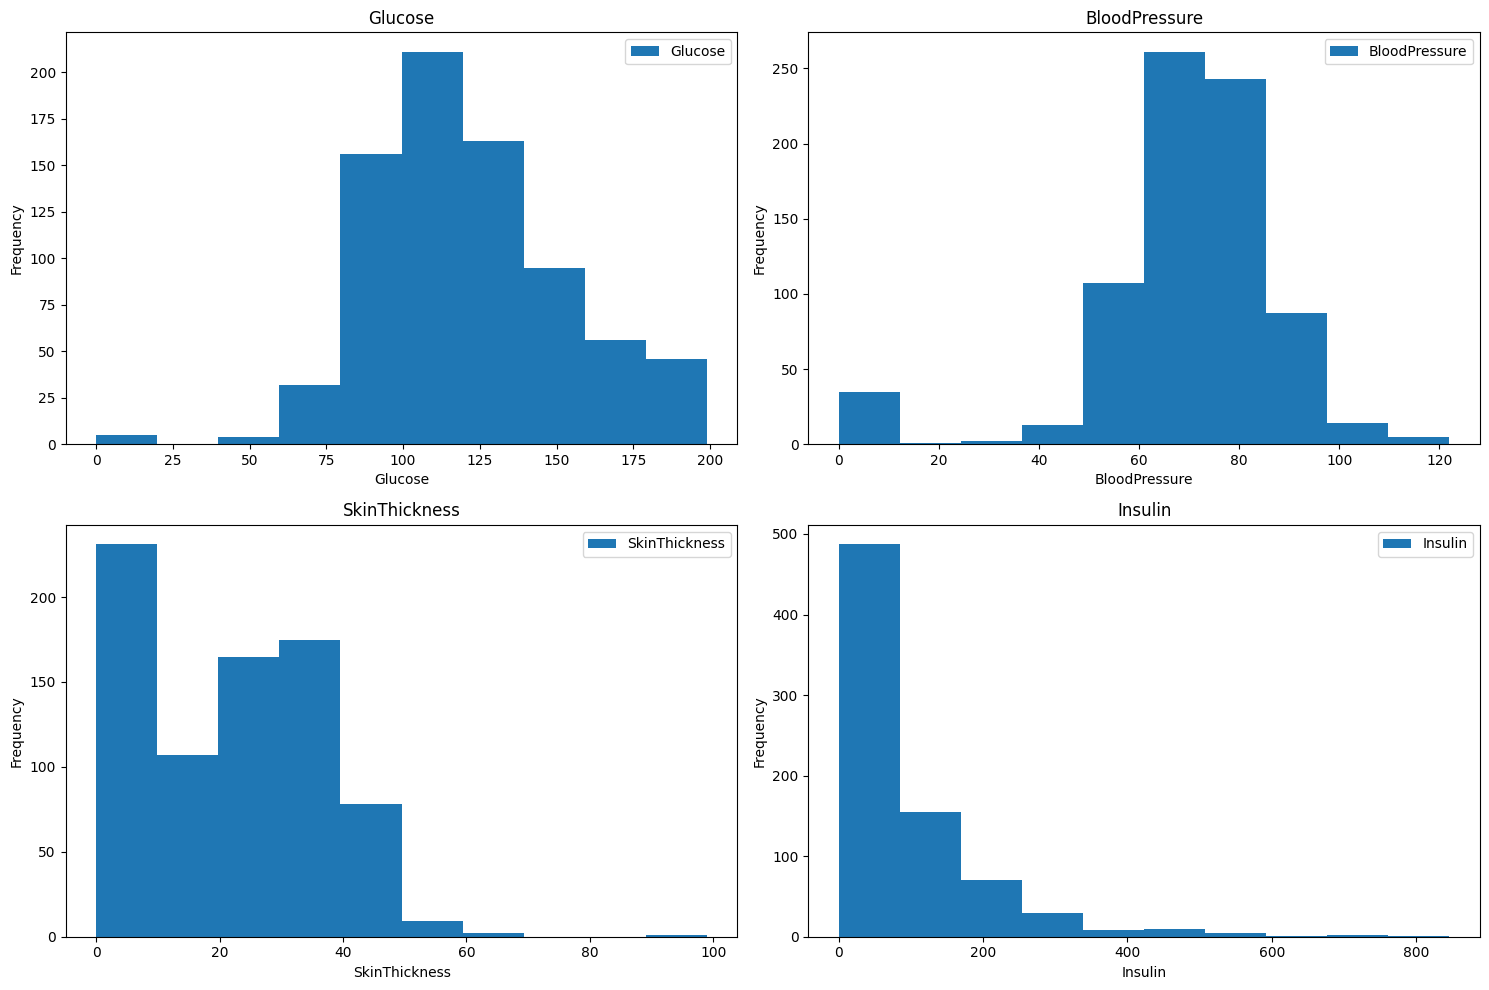

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace the file path with the correct one if necessary)
data = pd.read_csv('health care diabetes.csv')

# Check if the dataset contains the required columns
required_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
if not all(col in data.columns for col in required_columns):
    print("Error: The dataset does not contain all the required columns.")
else:
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    # Plot histograms for each column
    for i, col in enumerate(required_columns):
        data[col].plot(kind='hist', ax=axes[i], title=col, legend=True)
        axes[i].set_xlabel(col)

    plt.tight_layout()
    plt.show()


Violin plot for the selected features

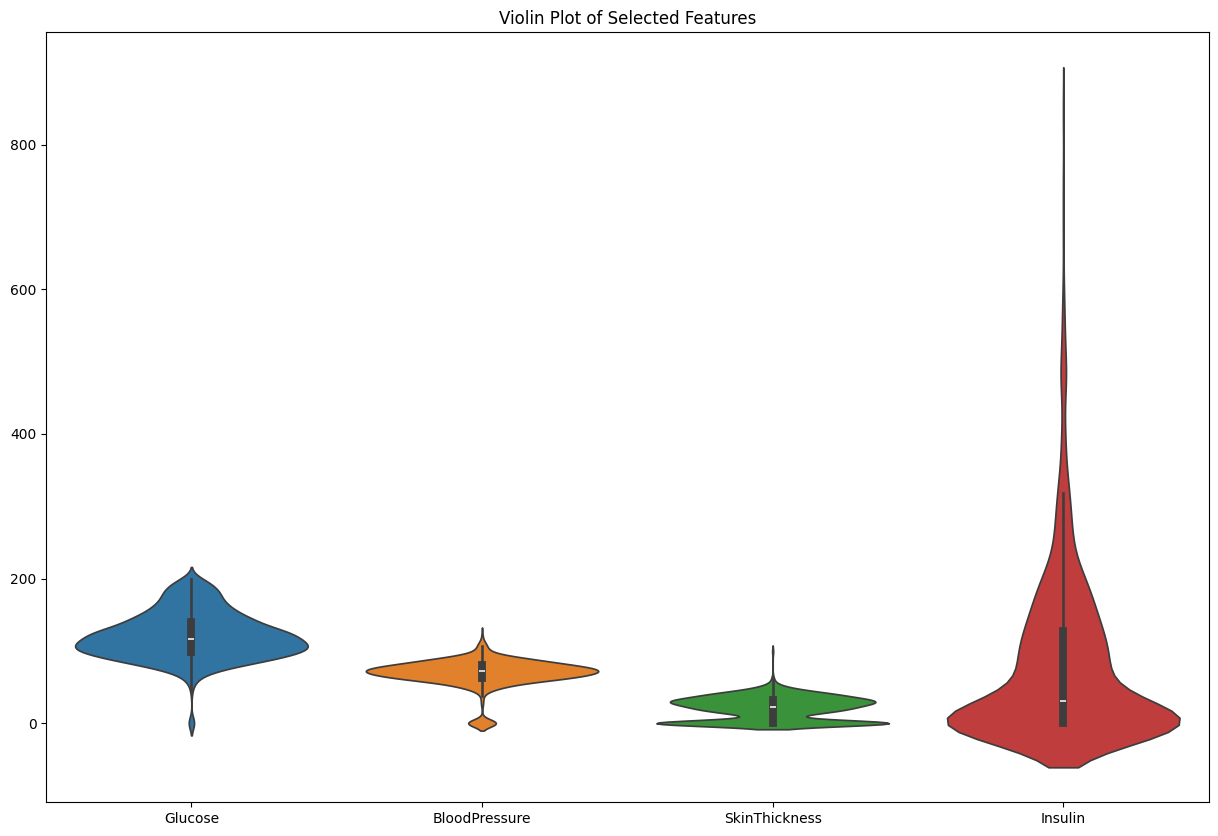

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with the correct path if necessary)
data = pd.read_csv('health care diabetes.csv')

# Define the selected columns to visualize
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Check if all selected columns are present in the dataset
if not all(col in data.columns for col in selected_columns):
    print("Error: The dataset does not contain all the selected columns.")
else:
    # Plot the violin plot
    plt.figure(figsize=(15, 10))
    sns.violinplot(data=data[selected_columns])
    plt.title("Violin Plot of Selected Features")
    plt.show()


The violin plot shows the distribution of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. The violin shape represents the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers.

# **Kernel Density Estimation (KDE) plot for the selected features**

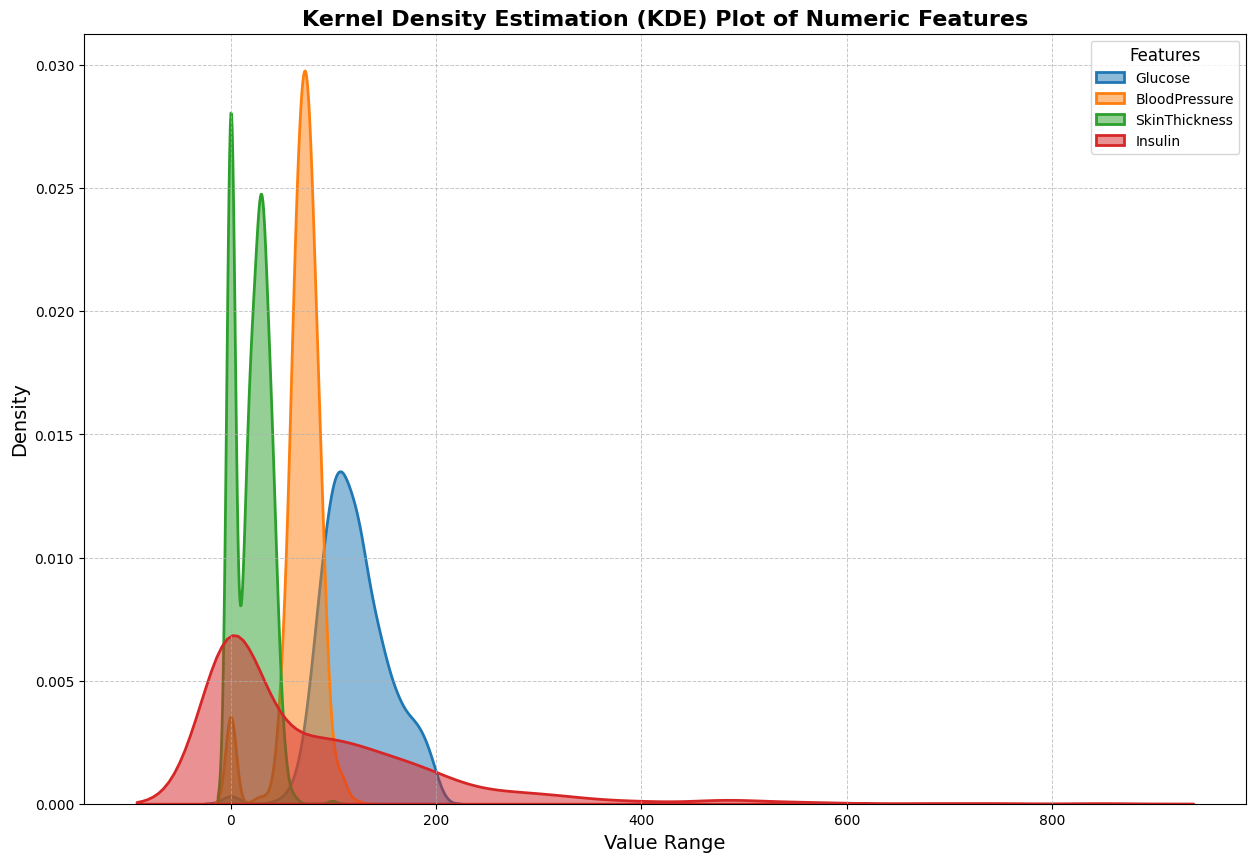

In [ ]:
plt.figure(figsize=(15, 10))

# Loop through each selected column for plotting
for column in selected_columns:
    sns.kdeplot(data[column], label=column, fill=True, alpha=0.5, linewidth=2)

# Add a title and axis labels
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features", fontsize=16, fontweight='bold')
plt.xlabel("Value Range", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Enhance the legend
plt.legend(title="Features", title_fontsize=12, fontsize=10, loc='upper right')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()


The image shows a Kernel Density Estimation (KDE) plot of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be used to visualize the distribution of the data.**bold text**

**Creating a count (frequency) plot describing the data types and the count of variables.**

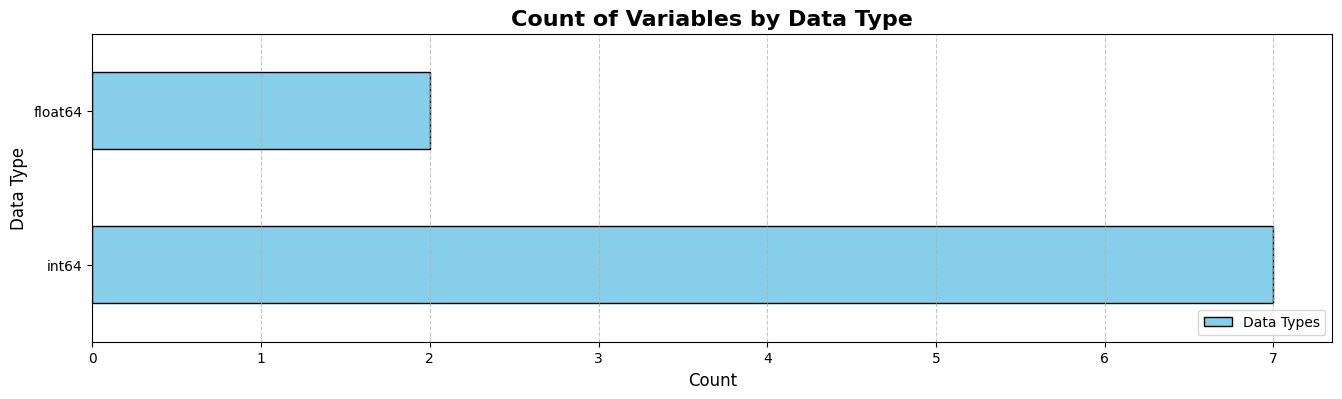

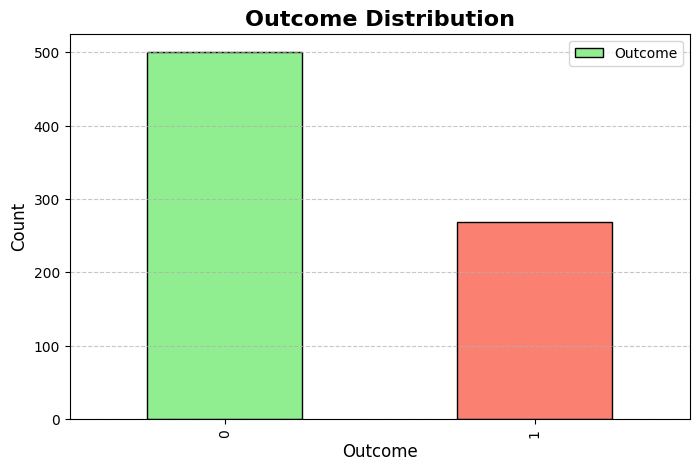

Percentage Distribution of Outcomes:
Outcome
0    65.1
1    34.9
Name: count, dtype: float64


In [ ]:
# Count plot for data types
plt.figure(figsize=(16, 4))
data.dtypes.value_counts().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Count of Variables by Data Type", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Data Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(["Data Types"], loc='lower right', fontsize=10)
plt.show()

# Count plot for 'Outcome' variable
plt.figure(figsize=(8, 5))
data['Outcome'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'], edgecolor='black')
plt.title("Outcome Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Outcome"], loc='upper right', fontsize=10)
plt.show()

# Percentage distribution for 'Outcome'
outcome_percentage = (data['Outcome'].value_counts() / data['Outcome'].shape[0]) * 100

# Display outcome percentages
print("Percentage Distribution of Outcomes:")
print(outcome_percentage.round(2))


Summary:
Variable Data Types:

The dataset consists of different types of variables (int64, float64, object, etc.), as shown in the first plot.
Understanding these types is crucial for selecting the right preprocessing methods and models.

Outcome Variable Distribution:

The Outcome variable shows how the dataset is split between its categories.
The bar plot indicates the frequency of each category, with distinct colors making the plot visually appealing.

Outcome Percentage:

The printed percentages provide an additional layer of insight, showing the relative distribution of the Outcome variable in the dataset.
For example, if the categories are imbalanced, this could affect model performance and require techniques like resampling.
These enhancements provide a clearer understanding of the dataset and key variables, facilitating informed decision-making during data preprocessing and analysis.








Inferences from Outcome Distribution
Class Imbalance:

The dataset exhibits class imbalance in the 'Outcome' variable.
Class 0 (No Diabetes) has 500 instances.
Class 1 (Diabetes) has 268 instances.
Potential Impact on Modeling:

Class imbalances may affect the performance of machine learning models, particularly for binary classification tasks.
Addressing class imbalance through techniques like resampling or using appropriate evaluation metrics may be necessary.
Consideration for Predictive Models:

Models may need to be evaluated and tuned considering the imbalanced distribution to avoid biased predictions toward the majority class.

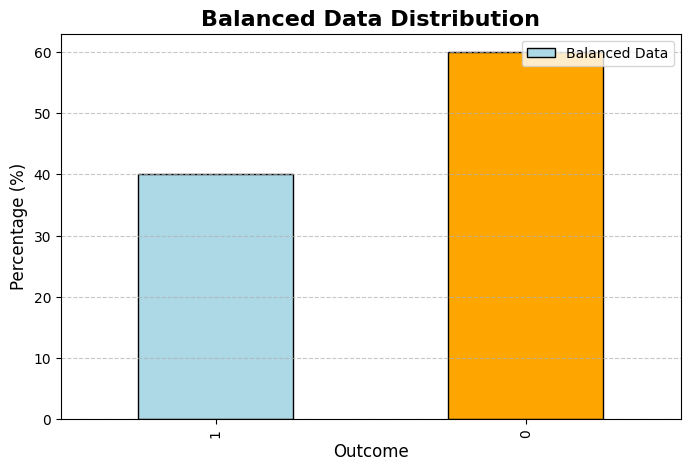

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset loading (replace with your dataset)
# Example: data = pd.read_csv('your_dataset.csv')
# Ensure 'Outcome' column exists in your dataset
data = pd.DataFrame({'Outcome': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]})  # Example data

# Step 1: Calculate the percentage distribution for 'Outcome'
outcome = (data['Outcome'].value_counts() / data['Outcome'].shape[0]) * 100

# Step 2: Calculate the complement percentage for balanced data
balanced_data = 100 - outcome

# Step 3: Plot the balanced data
plt.figure(figsize=(8, 5))
balanced_data.plot(kind='bar', color=['lightblue', 'orange'], edgecolor='black')
plt.title("Balanced Data Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Balanced Data"], loc='upper right', fontsize=10)
plt.show()


Explanation of the Code:

Data Preparation: Replace the data variable with your actual dataset containing the Outcome column.

Outcome Calculation: Calculate the percentage distribution of the Outcome variable.

Balanced Data Calculation: Compute the complement percentages for each category in Outcome.

Visualization: Create an informative bar plot of the balanced_data distribution.

# **Bi-Variate Analysis**
keyboard_arrow_down
Creating scatter charts between the pair of variables to understand the relationships.

Columns in the dataset: Index(['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness', 'Age',
       'Pregnancies', 'Outcome'],
      dtype='object')


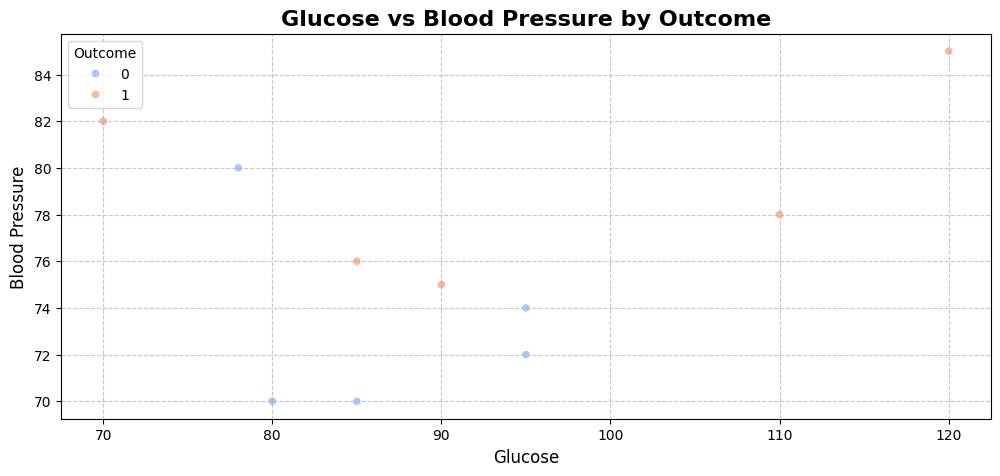

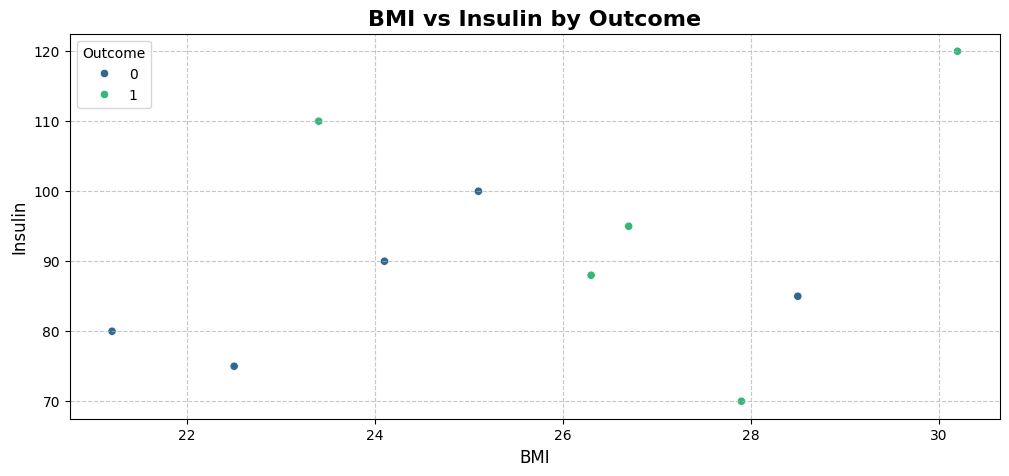

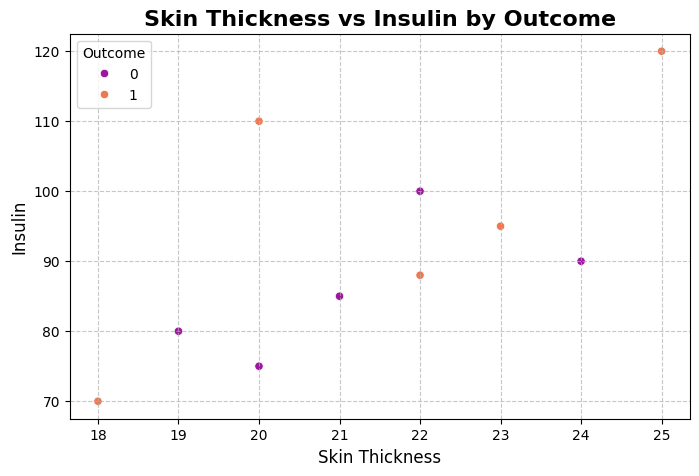

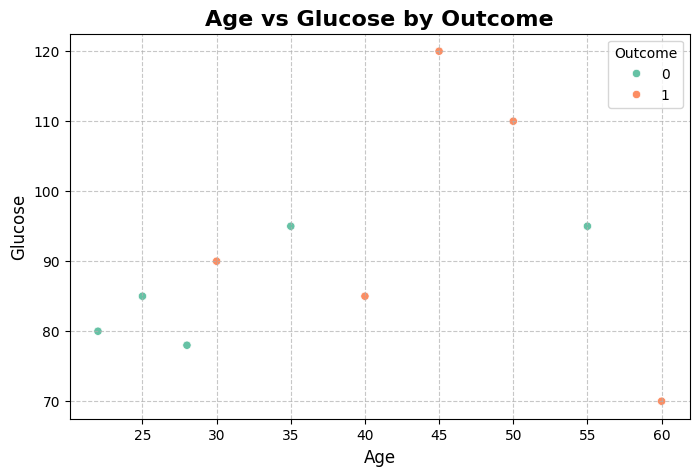

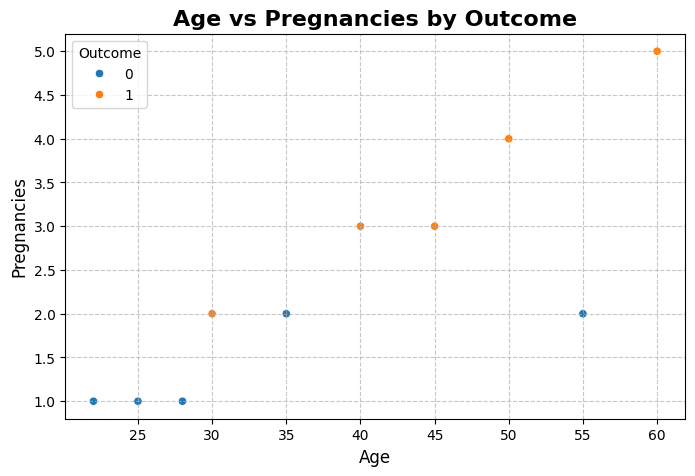

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for illustration (replace this with your actual dataset)
# Replace 'your_data.csv' with the actual path to your dataset
# data = pd.read_csv('your_data.csv')

# Sample dataset for demonstration (remove this when using your actual data)
data = pd.DataFrame({
    'Glucose': [85, 90, 78, 120, 95, 110, 85, 80, 70, 95],
    'BloodPressure': [70, 75, 80, 85, 72, 78, 76, 70, 82, 74],
    'BMI': [22.5, 26.3, 24.1, 30.2, 28.5, 26.7, 23.4, 21.2, 27.9, 25.1],
    'Insulin': [75, 88, 90, 120, 85, 95, 110, 80, 70, 100],
    'SkinThickness': [20, 22, 24, 25, 21, 23, 20, 19, 18, 22],
    'Age': [25, 30, 28, 45, 35, 50, 40, 22, 60, 55],
    'Pregnancies': [1, 2, 1, 3, 2, 4, 3, 1, 5, 2],
    'Outcome': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
})

# Check if the necessary columns exist in the dataset
print("Columns in the dataset:", data.columns)

# Code 1: Glucose vs. Blood Pressure
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=data, palette='coolwarm')
plt.title("Glucose vs Blood Pressure by Outcome", fontsize=16, fontweight='bold')
plt.xlabel("Glucose", fontsize=12)
plt.ylabel("Blood Pressure", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Outcome')
plt.show()

# Code 2: BMI vs. Insulin
plt.figure(figsize=(12, 5))
sns.scatterplot(x='BMI', y='Insulin', hue='Outcome', data=data, palette='viridis')
plt.title("BMI vs Insulin by Outcome", fontsize=16, fontweight='bold')
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Insulin", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Outcome')
plt.show()

# Code 3: Skin Thickness vs. Insulin
plt.figure(figsize=(8, 5))
sns.scatterplot(x='SkinThickness', y='Insulin', hue='Outcome', data=data, palette='plasma')
plt.title("Skin Thickness vs Insulin by Outcome", fontsize=16, fontweight='bold')
plt.xlabel("Skin Thickness", fontsize=12)
plt.ylabel("Insulin", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Outcome')
plt.show()

# Code 4: Age vs. Glucose
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=data, palette='Set2')
plt.title("Age vs Glucose by Outcome", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Glucose", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Outcome')
plt.show()

# Code 5: Age vs. Pregnancies
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=data, palette='tab10')
plt.title("Age vs Pregnancies by Outcome", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Pregnancies", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Outcome')
plt.show()


Explanations for Each Plot:

Glucose vs. Blood Pressure:
This plot shows the relationship between Glucose and BloodPressure for each Outcome (0 or 1). The color hue helps to differentiate the outcomes, which may reveal patterns or trends related to these two features.

BMI vs. Insulin:
Here, the plot explores the correlation between BMI (Body Mass Index) and Insulin levels. The Outcome variable is used to color the data points, highlighting how BMI and Insulin vary across different outcomes.

Skin Thickness vs. Insulin:
This plot examines how SkinThickness is related to Insulin levels, with the Outcome variable again used to differentiate the categories. This could indicate if skin thickness correlates with insulin resistance.

Age vs. Glucose:
The relationship between Age and Glucose is visualized here, showing how glucose levels vary with age. This can help identify if older individuals have higher glucose levels, which may be related to diabetes.

Age vs. Pregnancies:
This scatter plot visualizes the relationship between Age and the number of Pregnancies. It can provide insight into how age correlates with the number of pregnancies, and the Outcome distinction helps to analyze different results based on age.

Notes:
Palette Options: Different color palettes (coolwarm, viridis, plasma, Set2, tab10) are used to enhance the visualization and clearly differentiate the categories.
Gridlines: Gridlines are added to improve plot readability.
Legends: The Outcome is shown in the legend for easy identification of the categories.

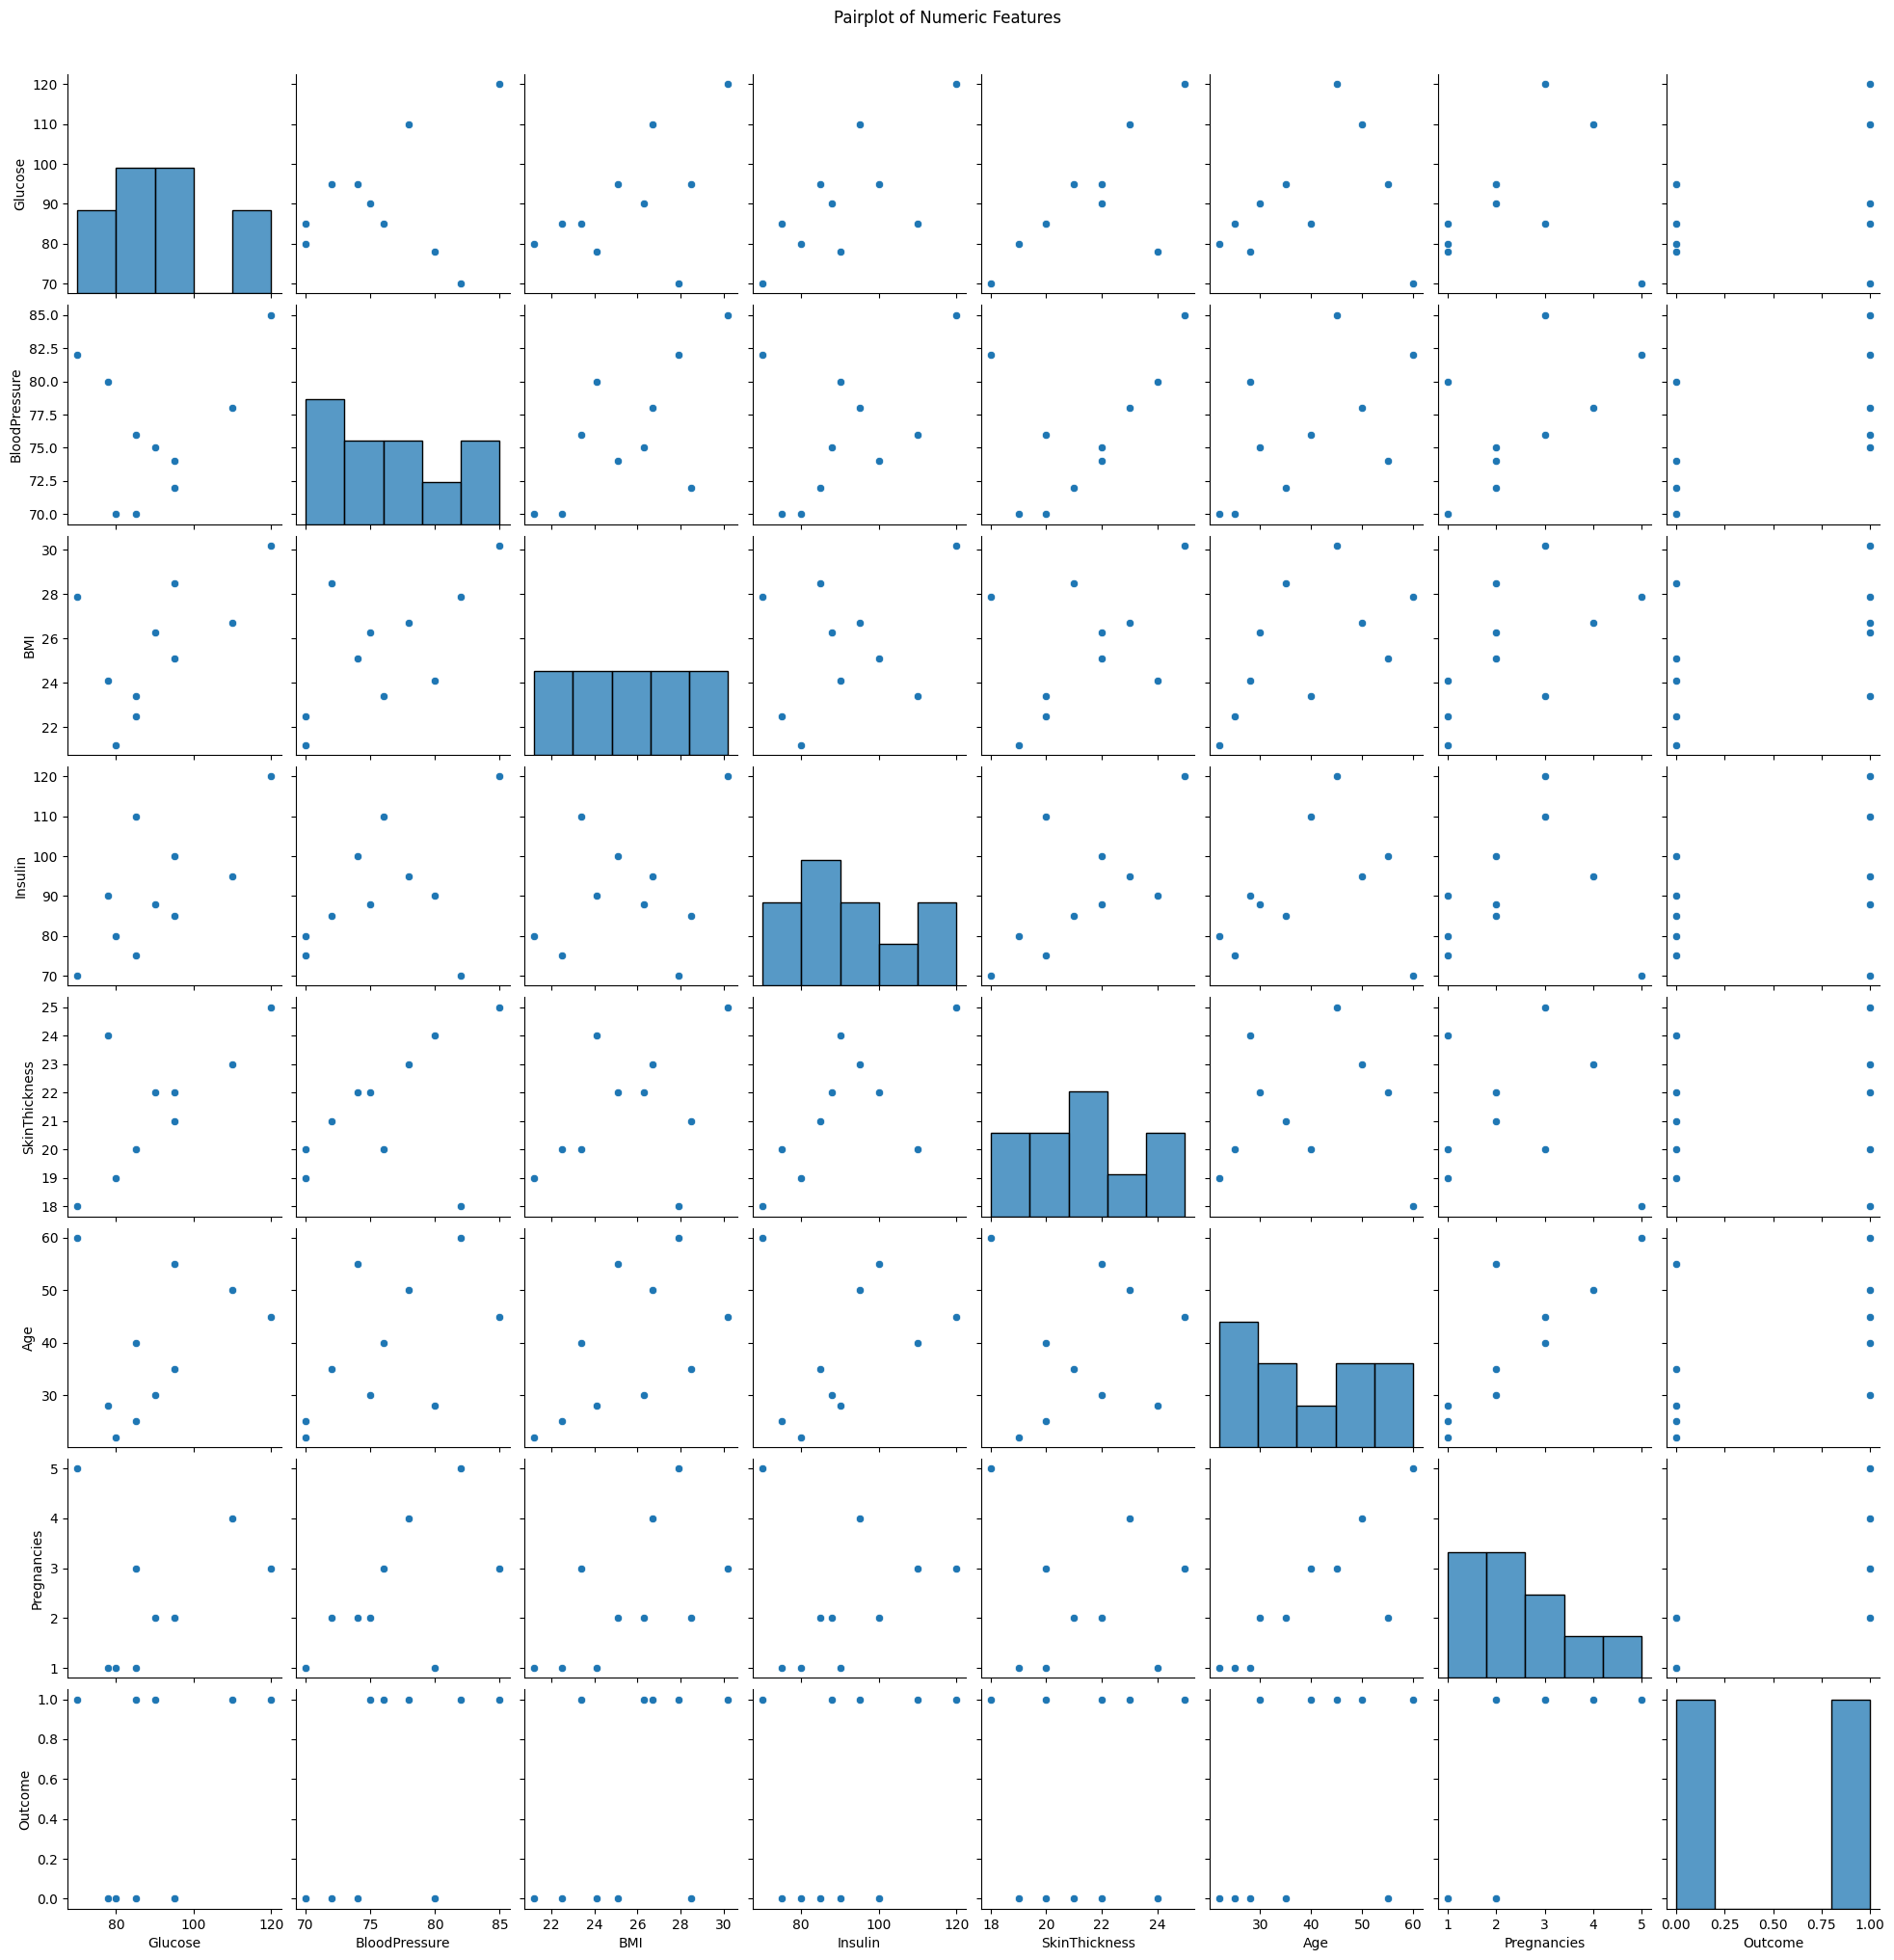

In [ ]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# **Multi-Variate Analysis**

keyboard_arrow_down

Perform correlation analysis. Visually explore it using a heat map.

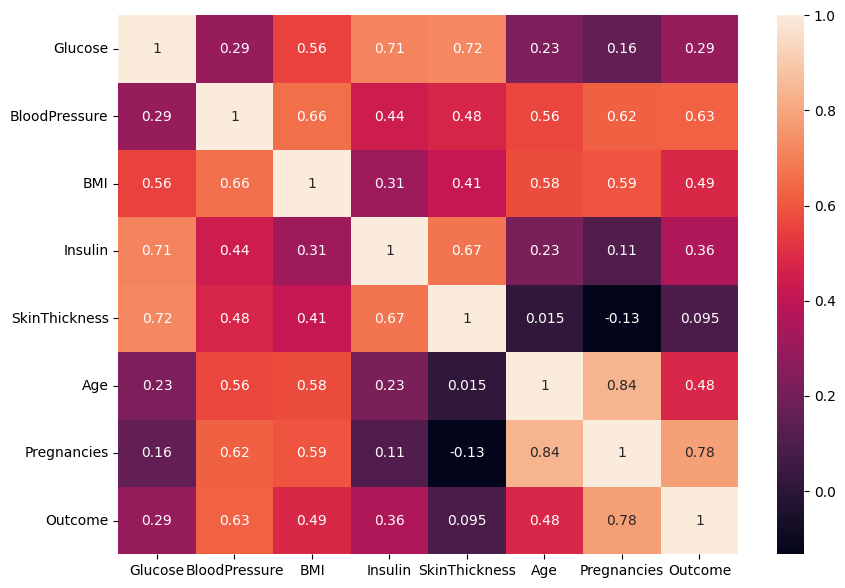

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

# **Devise Strategies for Model Building**

Key Considerations:

Decide the validation framework (e.g., train-test split, k-fold cross-validation).
Address class imbalance using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
Perform feature selection to retain important predictors.
Apply hyperparameter tuning for optimizing model performance.
Thought Process:

Identify the target variable (Outcome in this case).
Use feature selection techniques (e.g., correlation and statistical methods) to determine the most relevant features.
Handle class imbalance to avoid bias in predictions.
Train and evaluate multiple models, starting with simpler models like Logistic Regression and advancing to more complex ones like Random Forest or Decision Trees.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

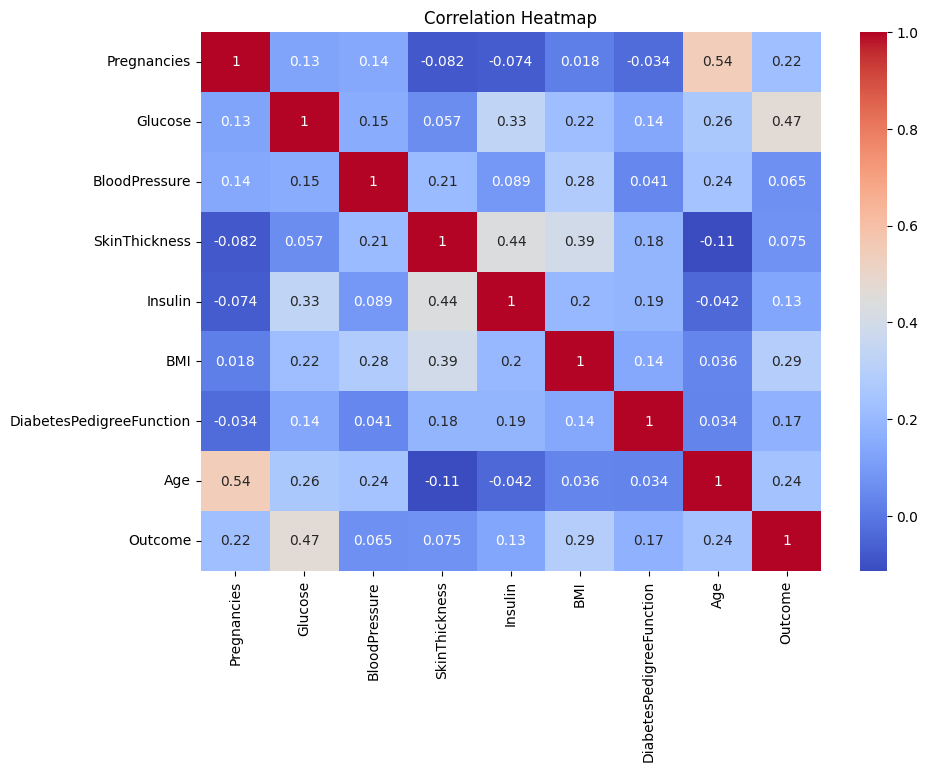

Feature Scores:
                     Feature        Score
4                   Insulin  2175.565273
1                   Glucose  1411.887041
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetesPedigreeFunction     5.392682


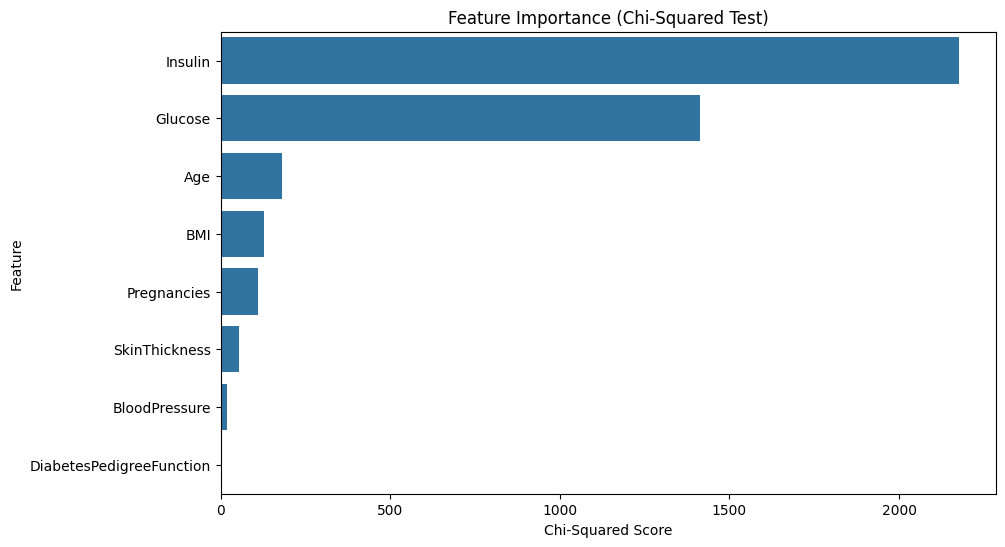

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset
data = pd.read_csv("health care diabetes.csv")

# Verify the structure of the dataset
print(data.info())
print(data.head())

# Dropping the target variable and splitting data
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

# Finding correlation with the target variable
correlation = data.corrwith(data['Outcome'])
print("Correlation with Outcome:\n", correlation)

# Visualizing correlation with heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Select top features using chi-squared test
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(x, y)

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': fit.scores_})
print("Feature Scores:\n", feature_scores.nlargest(8, 'Score'))

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores.sort_values(by='Score', ascending=False))
plt.title("Feature Importance (Chi-Squared Test)")
plt.xlabel("Chi-Squared Score")
plt.ylabel("Feature")
plt.show()


**Summary:**

Top Features: Lists the features most correlated with Outcome.

Visualization: A heatmap identifies relationships between features and highlights multicollinearity.


# **Data Preparation**

In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
try:
    data = pd.read_csv("health care diabetes.csv")
    print("Data loaded successfully!")
    print(data.info())  # Checking the structure of the dataset
except FileNotFoundError:
    print("File not found. Please ensure 'health care diabetes.csv' is in the working directory.")

# Verify column names and drop the least correlated feature
print("Columns in dataset:", data.columns)

# Dropping the least correlated feature (assumed 'BloodPressure') and the target ('Outcome')
if 'BloodPressure' in data.columns and 'Outcome' in data.columns:
    new_x = data.drop(['Outcome', 'BloodPressure'], axis=1).values
    new_y = data['Outcome'].values
else:
    print("Required columns not found in the dataset.")

# Splitting the dataset into training and testing sets
trainx, testx, trainy, testy = train_test_split(new_x, new_y, test_size=0.20, random_state=10)

# Check class distribution before applying SMOTE
print(f"Before Oversampling: Class 1: {sum(trainy == 1)}, Class 0: {sum(trainy == 0)}")

# Addressing class imbalance with SMOTE
try:
    sm = SMOTE(random_state=63)
    trainx_res, trainy_res = sm.fit_resample(trainx, trainy)
    print(f"After Oversampling: Class 1: {sum(trainy_res == 1)}, Class 0: {sum(trainy_res == 0)}")
except Exception as e:
    print("Error during SMOTE:", e)


Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Columns in dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Before Oversampling: Class 1

**Summary:**

SMOTE balances the dataset by creating synthetic samples for the minority class (Outcome = 1).

This ensures the model isn't biased toward the majority class.


## **Logistic Regression Model**

Accuracy: 0.7597402597402597
MSE: 0.24025974025974026
Confusion Matrix:
 [[72 23]
 [14 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        95
           1       0.66      0.76      0.71        59

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154

AUC: 0.831


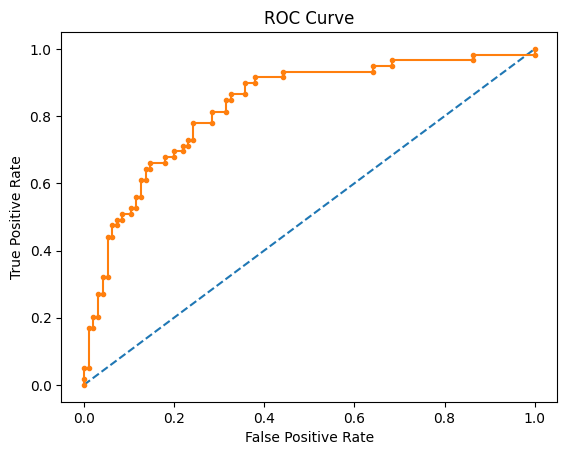

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Training Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=123)
logreg.fit(trainx_res, trainy_res)  # Train on the resampled data

# Predictions and Metrics
predictions = logreg.predict(testx)  # Predict on the original test set
print('Accuracy:', accuracy_score(testy, predictions))  # Accuracy score
print('MSE:', mean_squared_error(testy, predictions))  # Mean Squared Error
print('Confusion Matrix:\n', confusion_matrix(testy, predictions))  # Confusion Matrix
print('Classification Report:\n', classification_report(testy, predictions))  # Detailed classification report

# ROC Curve
probs = logreg.predict_proba(testx)[:, 1]  # Get probability predictions for the test set
auc = roc_auc_score(testy, probs)  # Calculate AUC score for the test set
print(f'AUC: {auc:.3f}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(testy, probs)  # Calculate false positive rate and true positive rate for the test set
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line representing random predictions
plt.plot(fpr, tpr, marker='.')  # Plot ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


**Summary:**

Metrics: Evaluates accuracy, confusion matrix, and classification report.

ROC Curve: Visualizes the model's discriminatory power (AUC).


# **Random Forest Model**

Accuracy: 0.7337662337662337
MSE: 0.2662337662337662
Confusion Matrix:
 [[69 26]
 [15 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        95
           1       0.63      0.75      0.68        59

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.73      0.74       154

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy (Best Model): 0.7337662337662337
MSE (Best Model): 0.2662337662337662
Confusion Matrix (Best Model):
 [[75 20]
 [21 38]]
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        95
           1       0.66      0.64      0.65        59

    accuracy                           0.73       154
   macro 

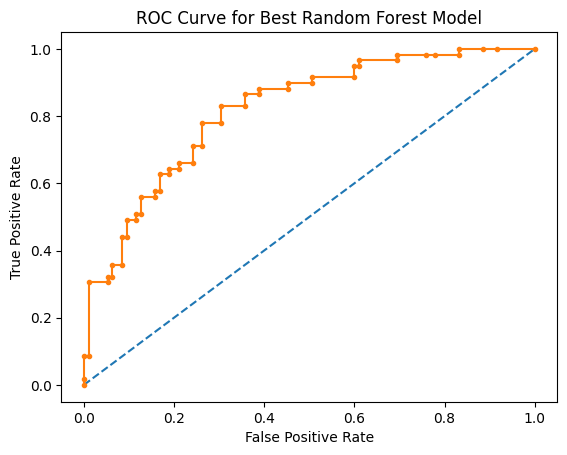

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import randint

# Training Random Forest
rf = RandomForestClassifier(random_state=42, max_depth=5)
rf.fit(trainx_res, trainy_res)
rf_predictions = rf.predict(testx)

# Metrics
print('Accuracy:', accuracy_score(testy, rf_predictions))
print('MSE:', mean_squared_error(testy, rf_predictions))
print('Confusion Matrix:\n', confusion_matrix(testy, rf_predictions))
print('Classification Report:\n', classification_report(testy, rf_predictions))

# Hyperparameter tuning with GridSearchCV (Reduced Grid Search Space)
param_grid = {
    'n_estimators': [100, 200],  # Reduced the number of estimators
    'max_depth': [5, 10],  # Reduced the max_depth values
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(trainx_res, trainy_res)
print('Best Parameters:', grid.best_params_)

# Retrain with best parameters
rf_best = grid.best_estimator_
rf_best.fit(trainx_res, trainy_res)

# Predictions with the best model
rf_best_predictions = rf_best.predict(testx)

# Metrics with the best model
print('Accuracy (Best Model):', accuracy_score(testy, rf_best_predictions))
print('MSE (Best Model):', mean_squared_error(testy, rf_best_predictions))
print('Confusion Matrix (Best Model):\n', confusion_matrix(testy, rf_best_predictions))
print('Classification Report (Best Model):\n', classification_report(testy, rf_best_predictions))

# ROC Curve for the best model
probs_best = rf_best.predict_proba(testx)[:, 1]
auc_best = roc_auc_score(testy, probs_best)
print(f'AUC (Best Model): {auc_best:.3f}')

fpr_best, tpr_best, _ = roc_curve(testy, probs_best)
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line representing random predictions
plt.plot(fpr_best, tpr_best, marker='.')  # Plot ROC curve for the best model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.show()


**Summary:**

Random Forest achieves robust results.

Hyperparameter tuning optimizes the model.


# **Decision Tree Model**

Accuracy: 0.6948051948051948
MSE: 0.3051948051948052
Confusion Matrix:
 [[71 24]
 [23 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75        95
           1       0.60      0.61      0.61        59

    accuracy                           0.69       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.69      0.70       154

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy (Best Model): 0.7142857142857143
MSE (Best Model): 0.2857142857142857
Confusion Matrix (Best Model):
 [[66 29]
 [15 44]]
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.81      0.69      0.75        95
           1       0.60      0.75      0.67        59

    accuracy                           0.71       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.71      0.72       154

AUC (Best Model): 0.760


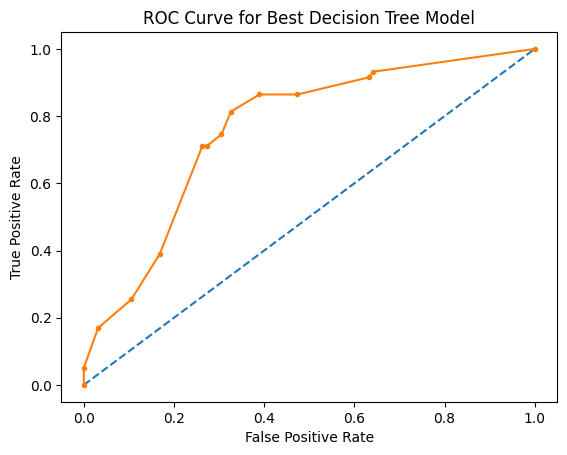

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Training Decision Tree
dc = DecisionTreeClassifier(random_state=42)
dc.fit(trainx_res, trainy_res)
dc_predictions = dc.predict(testx)

# Metrics
print('Accuracy:', accuracy_score(testy, dc_predictions))
print('MSE:', mean_squared_error(testy, dc_predictions))
print('Confusion Matrix:\n', confusion_matrix(testy, dc_predictions))
print('Classification Report:\n', classification_report(testy, dc_predictions))

# Hyperparameter tuning with GridSearchCV
dc_param_grid = {
    'splitter': ["best", "random"],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
}

dc_grid = GridSearchCV(estimator=dc, param_grid=dc_param_grid, cv=5, verbose=2, n_jobs=-1)
dc_grid.fit(trainx_res, trainy_res)
print('Best Parameters:', dc_grid.best_params_)

# Retrain with best parameters
dc_best = dc_grid.best_estimator_
dc_best.fit(trainx_res, trainy_res)

# Predictions with the best model
dc_best_predictions = dc_best.predict(testx)

# Metrics with the best model
print('Accuracy (Best Model):', accuracy_score(testy, dc_best_predictions))
print('MSE (Best Model):', mean_squared_error(testy, dc_best_predictions))
print('Confusion Matrix (Best Model):\n', confusion_matrix(testy, dc_best_predictions))
print('Classification Report (Best Model):\n', classification_report(testy, dc_best_predictions))

# ROC Curve for the best model
probs_best = dc_best.predict_proba(testx)[:, 1]
auc_best = roc_auc_score(testy, probs_best)
print(f'AUC (Best Model): {auc_best:.3f}')

fpr_best, tpr_best, _ = roc_curve(testy, probs_best)
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line representing random predictions
plt.plot(fpr_best, tpr_best, marker='.')  # Plot ROC curve for the best model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Decision Tree Model')
plt.show()


Decision Tree's simplicity is suitable for smaller datasets.

GridSearchCV fine-tunes hyperparameters.


# **Support Vector Machine (SVM) Model**

Accuracy: 0.7402597402597403
MSE: 0.2597402597402597
[[71 24]
 [16 43]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        95
           1       0.64      0.73      0.68        59

    accuracy                           0.74       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154

AUC: 0.839


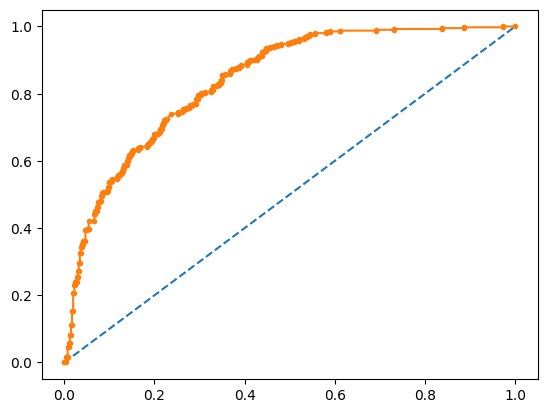

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Training Support Vector Machine
svm = SVC(kernel='linear', random_state=42, probability=True)
svm.fit(trainx_res, trainy_res)

# Predictions and Metrics
svm_predictions = svm.predict(testx)
print('Accuracy:', accuracy_score(testy, svm_predictions))
print('MSE:', mean_squared_error(testy, svm_predictions))
print(confusion_matrix(testy, svm_predictions))
print(classification_report(testy, svm_predictions))

# ROC Curve
probs_svm = svm.predict_proba(trainx_res)[:, 1]
auc_svm = roc_auc_score(trainy_res, probs_svm)
print(f'AUC: {auc_svm:.3f}')
fpr_svm, tpr_svm, _ = roc_curve(trainy_res, probs_svm)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_svm, tpr_svm, marker='.')
plt.show()


SVM with a linear kernel is effective for high-dimensional data and provides clear decision boundaries.

Metrics: Similar to the previous models, evaluates accuracy, confusion matrix, and classification report.

ROC Curve: Visualizes model performance with AUC.

# **K-Nearest Neighbors (KNN) Model**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Training K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainx_res, trainy_res)

# Predictions and Metrics
knn_predictions = knn.predict(testx)
print('Accuracy:', accuracy_score(testy, knn_predictions))
print('MSE:', mean_squared_error(testy, knn_predictions))
print(confusion_matrix(testy, knn_predictions))
print(classification_report(testy, knn_predictions))

# Hyperparameter Tuning (Optional)
from sklearn.model_selection import GridSearchCV

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, verbose=2, n_jobs=-1)
knn_grid.fit(trainx_res, trainy_res)
print('Best Parameters:', knn_grid.best_params_)

# Retrain with best parameters
knn_best = knn_grid.best_estimator_
knn_best.fit(trainx_res, trainy_res)


Accuracy: 0.6233766233766234
MSE: 0.37662337662337664
[[62 33]
 [25 34]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        95
           1       0.51      0.58      0.54        59

    accuracy                           0.62       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.63      0.62      0.63       154

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

**KNN** is a simple yet powerful algorithm based on the distance between points.

Metrics: Accuracy, confusion matrix, and classification report.

Hyperparameter Tuning: Fine-tune the number of neighbors and distance metrics to improve model performance.

### Final Notes on All Data Models:

1. **Logistic Regression**:
   - **Strengths**: Simple and interpretable, works well for binary classification problems, provides probability scores for predictions.
   - **Limitations**: Assumes linear relationships between features and the target variable; can struggle with non-linear data or large feature sets.
   - **Best Use Case**: When interpretability is important, and the data is linearly separable or nearly so.

2. **Random Forest**:
   - **Strengths**: Robust, handles both numerical and categorical data, can capture non-linear relationships, and provides feature importance.
   - **Limitations**: Can be computationally expensive, less interpretable than simpler models.
   - **Best Use Case**: When high accuracy is required and interpretability is less of a concern, or when you have a complex dataset with non-linear relationships.

3. **Decision Tree**:
   - **Strengths**: Simple and interpretable, works well with both categorical and continuous data, and easy to visualize.
   - **Limitations**: Prone to overfitting if not properly tuned, especially with deep trees.
   - **Best Use Case**: When model interpretability and simplicity are important, and the data is not highly complex.

4. **Support Vector Machine (SVM)**:
   - **Strengths**: Effective in high-dimensional spaces, works well with both linear and non-linear data using kernels.
   - **Limitations**: Can be computationally expensive, particularly for large datasets, and difficult to interpret.
   - **Best Use Case**: When you need a model that can handle complex boundaries and high-dimensional data, especially for binary classification.

5. **K-Nearest Neighbors (KNN)**:
   - **Strengths**: Simple and intuitive, works well for small datasets, no explicit training phase.
   - **Limitations**: Computationally expensive at prediction time (especially with large datasets), sensitive to irrelevant features, and requires a good choice of distance metric.
   - **Best Use Case**: When the data is not too large and the relationships between features are not too complex.

---

### Model Comparison Result:
- **Performance**: Random Forest and Support Vector Machines (SVM) tend to offer the highest accuracy due to their ability to handle complex relationships in the data.
- **Interpretability**: Logistic Regression and Decision Trees are the most interpretable models, making them suitable when you need to understand and explain the model’s decision-making process.
- **Computational Complexity**: Logistic Regression and Decision Trees are computationally lighter, while Random Forest and SVM can become more resource-intensive, especially with large datasets.
- **Best for Imbalanced Data**: Random Forest and SVM tend to perform well with imbalanced data, especially when combined with techniques like SMOTE for oversampling the minority class.



### Project Summary:

The project involves developing a machine learning model to predict whether a patient has diabetes based on various medical features. The dataset is loaded and preprocessed by handling missing values, which are replaced with the mean values of corresponding columns. Outliers in key features such as Glucose, Blood Pressure, Skin Thickness, and Insulin are detected using the Interquartile Range (IQR) method and visualized using boxplots. To prepare the data for modeling, scaling is performed using `StandardScaler` to standardize the features, ensuring they have a mean of 0 and a standard deviation of 1.

A Logistic Regression model is then built, and the data is split into training (70%) and test (30%) sets. The model's performance is evaluated using several metrics, including accuracy, precision, recall, F1-score, confusion matrix, and ROC AUC score. These evaluations provide a comprehensive understanding of how well the model predicts the presence of diabetes in patients, helping assess its effectiveness and identify areas for improvement.